In [18]:
import torch
import torch.nn.functional as F     # 激励函数都在这
from torch.autograd import Variable

# 做一些假数据来观看图像
x = torch.linspace(-5, 5, 200)  # x data (tensor), shape=(100, 1)
x = Variable(x)

x_np = x.data.numpy()   # 换成 numpy array, 出图时用

# 几种常用的 激励函数
y_relu = F.relu(x).data.numpy()
y_sigmoid = F.sigmoid(x).data.numpy()
y_tanh = F.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()
# y_softmax = F.softmax(x)  softmax 比较特殊, 不能直接显示, 不过他是关于概率的, 用于分类



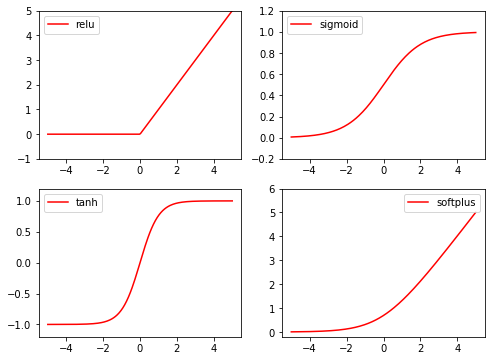

In [19]:
import matplotlib.pyplot as plt  # python 的可视化模块, 我有教程 (https://morvanzhou.github.io/tutorials/data-manipulation/plt/)

plt.figure(1, figsize=(8, 6))
plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

plt.show()

In [7]:
import torch
import numpy as np

# details about math operation in torch can be found in: http://pytorch.org/docs/torch.html#math-operations
# convert numpy to tensor or vise versa

np_data = np.arange(6).reshape((2, 3))
torch_data = torch.from_numpy(np_data)
tensor2array = torch_data.numpy()
print(
    '\nnumpy array:', np_data,          # [[0 1 2], [3 4 5]]
    '\ntorch tensor:', torch_data,      #  0  1  2 \n 3  4  5    [torch.LongTensor of size 2x3]
    '\ntensor to array:', tensor2array, # [[0 1 2], [3 4 5]]
)


# abs
data = [-1, -2, 1, 2]
tensor = torch.FloatTensor(data)  # 32-bit floating point
print(
    '\nabs',
    '\nnumpy: ', np.abs(data),          # [1 2 1 2]
    '\ntorch: ', torch.abs(tensor)      # [1 2 1 2]
)

# sin
print(
    '\nsin',
    '\nnumpy: ', np.sin(data),      # [-0.84147098 -0.90929743  0.84147098  0.90929743]
    '\ntorch: ', torch.sin(tensor)  # [-0.8415 -0.9093  0.8415  0.9093]
)

# mean
print(
    '\nmean',
    '\nnumpy: ', np.mean(data),         # 0.0
    '\ntorch: ', torch.mean(tensor)     # 0.0
)

# matrix multiplication
data = [[1,2], [3,4]]
tensor = torch.FloatTensor(data)  # 32-bit floating point
# correct method
print(
    '\nmatrix multiplication (matmul)',
    '\nnumpy: ', np.matmul(data, data),     # [[7, 10], [15, 22]]
    '\ntorch: ', torch.mm(tensor, tensor)   # [[7, 10], [15, 22]]
)
# incorrect method
data = np.array(data)
print(
    '\nmatrix multiplication (dot)',
    '\nnumpy: ', data.dot(data),        # [[7, 10], [15, 22]]
    '\ntorch: ', tensor.dot(tensor)     # this will convert tensor to [1,2,3,4], you'll get 30.0
)


numpy array: [[0 1 2]
 [3 4 5]] 
torch tensor: 
 0  1  2
 3  4  5
[torch.LongTensor of size 2x3]
 
tensor to array: [[0 1 2]
 [3 4 5]]

abs 
numpy:  [1 2 1 2] 
torch:  
 1
 2
 1
 2
[torch.FloatTensor of size 4]


sin 
numpy:  [-0.84147098 -0.90929743  0.84147098  0.90929743] 
torch:  
-0.8415
-0.9093
 0.8415
 0.9093
[torch.FloatTensor of size 4]


mean 
numpy:  0.0 
torch:  0.0

matrix multiplication (matmul) 
numpy:  [[ 7 10]
 [15 22]] 
torch:  
  7  10
 15  22
[torch.FloatTensor of size 2x2]



RuntimeError: Expected argument self to have 1 dimension(s), but has 2 at /Users/soumith/miniconda2/conda-bld/pytorch_1503975723910/work/torch/csrc/generic/TensorMethods.cpp:23020

In [1]:
import torch
import numpy as np


In [2]:
np_data=np.arange(6).reshape((2,3))
torch_data=torch.from_numpy((np_data))
tensor2array=torch_data.numpy()
print(
    '\nnumpy array:', np_data,          # [[0 1 2], [3 4 5]]
    '\ntorch tensor:', torch_data,      #  0  1  2 \n 3  4  5    [torch.LongTensor of size 2x3]
    '\ntensor to array:', tensor2array, # [[0 1 2], [3 4 5]]
)


numpy array: [[0 1 2]
 [3 4 5]] 
torch tensor: 
 0  1  2
 3  4  5
[torch.LongTensor of size 2x3]
 
tensor to array: [[0 1 2]
 [3 4 5]]


### 关系拟合 (回归)

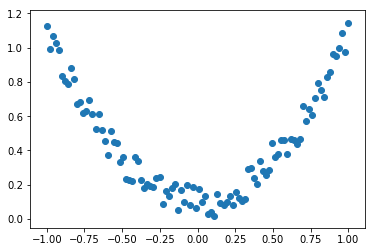

In [11]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt


x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

# 用 Variable 来修饰这些数据 tensor
x, y = torch.autograd.Variable(x), Variable(y)

# 画图
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [12]:
import torch
import torch.nn.functional as F     # 激励函数都在这

class Net(torch.nn.Module):  # 继承 torch 的 Module
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()     # 继承 __init__ 功能
        # 定义每层用什么样的形式
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # 隐藏层线性输出
        self.predict = torch.nn.Linear(n_hidden, n_output)   # 输出层线性输出

    def forward(self, x):   # 这同时也是 Module 中的 forward 功能
        # 正向传播输入值, 神经网络分析出输出值
        x = F.relu(self.hidden(x))      # 激励函数(隐藏层的线性值)
        x = self.predict(x)             # 输出值
        return x

net = Net(n_feature=1, n_hidden=10, n_output=1)

print(net)  # net 的结构

Net (
  (hidden): Linear (1 -> 10)
  (predict): Linear (10 -> 1)
)


Populating the interactive namespace from numpy and matplotlib
Net (
  (hidden): Linear (1 -> 10)
  (predict): Linear (10 -> 1)
)


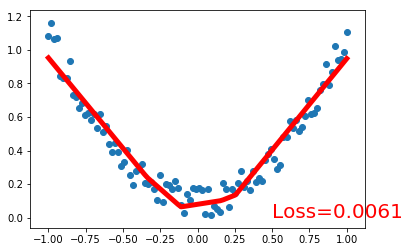

In [13]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation
from IPython.display import HTML
%pylab inline
#%matplotlib inline

torch.manual_seed(1)    # reproducible

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)

# plt.scatter(x.data.numpy(), y.data.numpy())
# plt.show()


class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
print(net)  # net architecture

optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

plt.ion()   # something about plotting

for t in range(100):
    prediction = net.forward(x)     # input x and predict based on x
    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)
    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    
    if t % 5 == 0:
        # plot and show learning process
        num=t/5
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data[0], fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
        plt.savefig('%d.png'%num,dpi=100)
plt.ioff()
#plt.show()

In [14]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation
from IPython.display import HTML
%pylab inline
#%matplotlib inline

torch.manual_seed(1)    # reproducible

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)

# plt.scatter(x.data.numpy(), y.data.numpy())
# plt.show()


class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
print(net)  # net architecture

optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

def animation(i):
    prediction = net.forward(x)     # input x and predict based on x
    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)
    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()   
    xgif=x.data.numpy()
    ygif=y.data.numpy()
    ypredcit=prediction.data.numpy()
    
        

Populating the interactive namespace from numpy and matplotlib
Net (
  (hidden): Linear (1 -> 10)
  (predict): Linear (10 -> 1)
)


In [15]:
pwd

'/Users/brettlv/blog/brettlv.github.io/pythoncode'

In [16]:
ls *.png

0.png                         bb.png
1.png                         curve01.png
10.png                        curve02.png
11.png                        curve03.png
12.png                        curve04.png
13.png                        curve05.png
14.png                        curve06.png
15.png                        curve07.png
16.png                        curveall.png
17.png                        fit_bb.png
18.png                        gwpytest01.png
19.png                        lovecurve.png
2.png                         testls.png
3.png                         triangle.png
4.png                         v404_0620_lc.png
5.png                         v404_0620_lc_left.png
6.png                         v404_0620_lc_right.png
7.png                         v404_0620_pds.png
8.png                         v404_0620_pds_left.png
9.png                         v404_0620_pds_right.png
Bfrac.png                     v404_0622.png
FIRST_range.png               v404_0622_lc.png
MutimeofHMCNC_

In [4]:
#import png2gif
#png2gif [0-9]*.png

Populating the interactive namespace from numpy and matplotlib


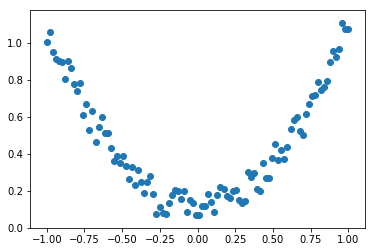

In [10]:
import torch
import matplotlib.pyplot as plt
from torch.autograd import Variable
%pylab inline

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)
x, y = torch.autograd.Variable(x), Variable(y)
# 画图
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()